### Naïve Bayes Classifier for Sentiment Analysis of Amazon Users’ Reviews of Refurbished iPhone 7s
Naive Bayes is one of the simplest classification algorithms for large chunks of data. It is used in various applications such as spam filtering, text classification, sentiment analysis, and recommendation systems. It uses the Bayes probability theorem for unknown class prediction.

### Importing Packages

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import numpy as np 
import scipy 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Given a list of tokens and a list of vocabulary
# Return the count of each vocabulary occurance in the list of tokens
def vectorize(tokens, filtered_vocab):
    vector=[]
    # For each word in filtered vocabulary list append the number of occurances in the tokens
    for word in filtered_vocab:
      vector.append(tokens.count(word))
    return vector

### Choosing Words For Bag Of Words Method

In [7]:
# Given Key Words
key_words = ["great", "happy", "bad", "return"]
# I am using tab separated version that is why delimiter = \t
# It is common in texts, especially reviews, to see a comma in them
data = pd.read_csv("C:\\Users\\elija\\Downloads\\reviews.txt", delimiter = "\t", quoting = 3, encoding= 'unicode_escape')
# Convert the words in the reviews colom to lower case
data['Review'] = data['Review'].str.strip().str.lower()
texts = ["The phone arrived in pretty decent condition. The front screen was scratch-free and the display is great, but there is a long scratch on the back of the phone. This doesn't bother me much because I always have a case on my phone. However, the issue with this phone is that the cellular signal won't work; the device detects the sim but the signal is bad. Apparently this is an issue with some iPhone 7 models, but the any free of charge repair is not valid because the phone is coming from a third party seller. After speaking with Apple, Verizon (my mobile carrier), AND Amazon, I've reached the conclusion that the issue is with the phone. I've tried everything to troubleshoot, but I will unfortunately have to return the item and get another one.", "iPhone 7 Black came in excellent condition. Like new. No scratches or scuffs. Works great. Was happy for couple months until phone started to develop issues with hearing callers and vs versa. Callers can’t hear me and I can’t hear callers, the sound is bad. Checked settings . Disabled WiFi calling. Hard reset phone. Updated iOS. Happens randomly. Suspect possible known defects on iPhone 7 with audio IC chips. I want to return the phone but I’m waiting to se for a month"]

In [9]:
# Splitting data for test and training

x, x_test, y, y_test = train_test_split(data['Review'], data['Liked'], test_size=0.50, random_state=0)

In [6]:
# Showcasing dataframe with proper indication of positive and negative reviews.
data

,Review,Liked
0,"""i've seen a lot of bad reviews for this phone...",1
1,"""this phone looks and performs great like it's...",1
2,"""don't listen to bad reviews! my phone arrived...",1
3,"""love this phone! i am so glad i bought a refu...",1
4,"""first, seller did a great job and i think i g...",1
5,"""received prompt delivery of the phone. i inse...",1
6,"""overall, the phone isn't too bad for the pric...",0
7,"""the iphone 7 i purchased was """"certified refu...",0
8,"""initially i was happy with the phone. it look...",0
9,"""be cautious - if you have any issues at all, ...",0


In [10]:
# This will return the occurances of each key word per review, also is vectorizing Review data.

vectors = []
for i in data['Review']:
  tokens = i.split()
  vector = vectorize(tokens, key_words)
  vectors.append(vector)
df = pd.DataFrame(vectors, columns = key_words)
print(df)

   great  happy  bad  return
0      0      2    1       0
1      1      1    0       0
2      1      1    1       0
3      0      1    0       0
4      1      1    1       0
5      0      1    0       0
6      0      0    3       1
7      0      0    1       0
8      1      1    1       1
9      0      0    0       1


In [11]:
# texts = ["The phone arrived in pretty decent condition. The front screen was scratch-free and the display is great, but there is a long scratch on the back of the phone. This doesn't bother me much because I always have a case on my phone. However, the issue with this phone is that the cellular signal won't work; the device detects the sim but the signal is bad. Apparently this is an issue with some iPhone 7 models, but the any free of charge repair is not valid because the phone is coming from a third party seller. After speaking with Apple, Verizon (my mobile carrier), AND Amazon, I've reached the conclusion that the issue is with the phone. I've tried everything to troubleshoot, but I will unfortunately have to return the item and get another one.", "iPhone 7 Black came in excellent condition. Like new. No scratches or scuffs. Works great. Was happy for couple months until phone started to develop issues with hearing callers and vs versa. Callers can’t hear me and I can’t hear callers, the sound is bad. Checked settings . Disabled WiFi calling. Hard reset phone. Updated iOS. Happens randomly. Suspect possible known defects on iPhone 7 with audio IC chips. I want to return the phone but I’m waiting to se for a month"]
# vectors = []
# for text in texts:
#   tokens = text.split()
#   neet = vectorize(tokens, key_words)
#   vectors.append(neet)
# df = pd.DataFrame(vectors, columns = key_words)
# print(data)

In [13]:
# Returning model score of NB classifier.

X = data['Review']
y = data['Liked']
vector = CountVectorizer(stop_words='english', vocabulary=key_words)
X = vector.fit_transform(X).toarray()
model = MultinomialNB()
model.fit(X,y)
print('The model score is', model.score(X,y))

The model score is 0.8


In [14]:
# Making predicitions on test data

predictions = model.predict(vector.transform(testing_df['Review']))
testing_df['Liked'] = predictions
testing_df

,Review,Liked
0,The phone arrived in pretty decent condition. ...,0
1,iPhone 7 Black came in excellent condition. Li...,1


In [11]:
# Alternate way of showing predictions
prediction = model.predict(vector.transform(texts))
for p in prediction:
  if p == 1:
    print("Positive")
  else:
    print("Negative")

Negative
Positive


In [12]:
# model log probabilty
model.feature_log_prob_

array([[-1.67397643, -2.07944154, -0.98082925, -1.16315081],
       [-1.33500107, -0.86499744, -1.55814462, -2.2512918 ]])

### For this section, I will be Implement the backpropagation algorithm to train a neural network with only two hidden neurons (1 hidden layer).

In [15]:
# Making sure file reads properly
col_names = ['input', 'output']
df = pd.read_csv("C:\\Users\\elija\\Downloads\\inputHW_ExtraCredit.csv", names = col_names)
df.head(10)

,input,output
0,0.318328,0.750789
1,0.344461,-0.648483
2,0.357117,1.122161
3,0.461714,-0.024687
4,0.971318,2.558952
5,0.975404,2.707666
6,1.269868,3.532343
7,1.418863,2.639893
8,1.576131,1.487547
9,1.711867,2.339642


### Importing Packages

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
# Splitting input & output into train and test set.
X = df["input"]
y = df["output"]
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [19]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation="linear"))
model.add(Dense(2, activation="linear"))
model.add(Dense(1, activation="linear"))

In [20]:
model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 2)                 4         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Running Backproogation

fitted_model = model.fit(X, y,epochs=150,verbose=1 ,batch_size=10, shuffle= True)

Epoch 1/150
5/5 [==============================] - 1s 3ms/step - loss: 7.2150 - mean_absolute_error: 7.2150
Epoch 2/150
5/5 [==============================] - 0s 3ms/step - loss: 1.6225 - mean_absolute_error: 1.6225
Epoch 3/150
5/5 [==============================] - 0s 2ms/step - loss: 1.2656 - mean_absolute_error: 1.2656
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 1.6550 - mean_absolute_error: 1.6550
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 1.4065 - mean_absolute_error: 1.4065
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 1.8085 - mean_absolute_error: 1.8085
Epoch 7/150
5/5 [==============================] - 0s 4ms/step - loss: 1.1494 - mean_absolute_error: 1.1494
Epoch 8/150
5/5 [==============================] - 0s 3ms/step - loss: 1.4293 - mean_absolute_error: 1.4293
Epoch 9/150
5/5 [==============================] - 0s 3ms/step - loss: 1.3258 - mean_absolute_error: 1.3258
Epoch 10/150
5/5 [==========

In [35]:
model.layers[0].get_weights()

[array([[-1.4508939]], dtype=float32), array([0.00924887], dtype=float32)]

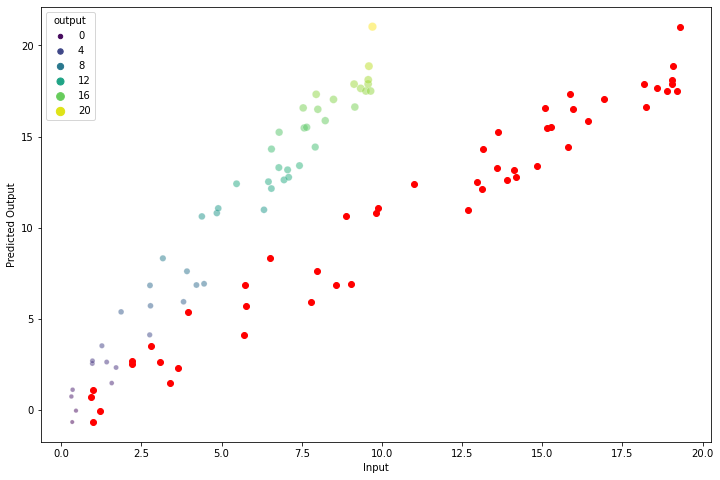

In [41]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=X, y=y, size=y, alpha=0.5, hue=y, palette='viridis')
plt.scatter(np.squeeze(model.predict_on_batch(X)),np.squeeze(y),c='red')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.show()

In [16]:
'We can see that correlation between these two axes is the predicted output is the optimized input vector.'

'We can see that correlation between these two axes is the predicted output is the optimized input vector.'